## Data Cleaning

Clean and prepare the data. Remember to treat data issues, perform feature scaling, encoding and any other relevant transformations.

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage


In [372]:
df=pd.read_csv('/Users/shubhangimallik/Downloads/Customer_Data.csv')

In [373]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Checking for null values

In [375]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are very few null values in the dataset so they can be removed. This removal will not affect our overall analysis

In [376]:
df.dropna(inplace=True)

In [377]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In the following, we can also drop the duplicates

In [378]:
df.drop_duplicates(inplace=True)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

In [380]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [381]:
df_copy=df.copy()

Perform an EDA to understand the data and identify patterns that could inform the clustering

## EDA

## Univariate Analysis

Here, I have selected few numeric coloumns to do some EDA

In [415]:
numeric_cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS']

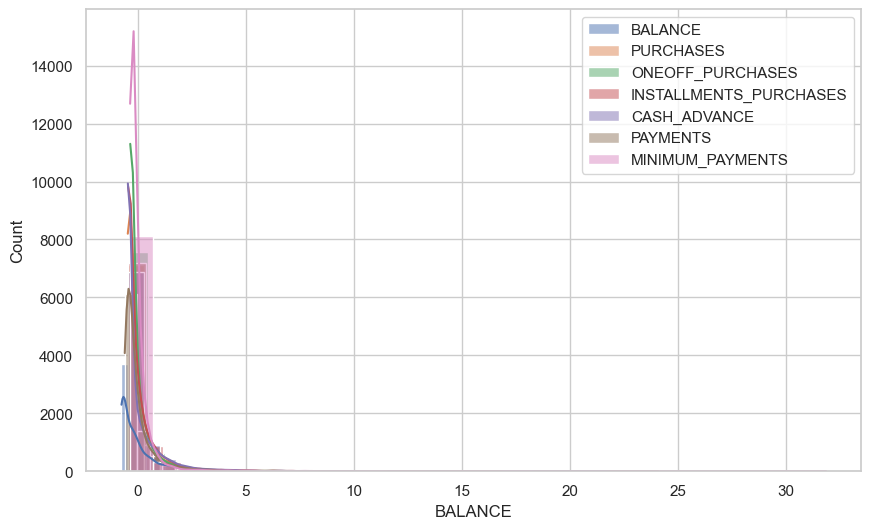

In [416]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for column in numeric_cols:
    sns.histplot(df[column], kde=True, bins=30, label=column)
plt.legend()
plt.show()




The data is heavily skewed and is not normally distributed

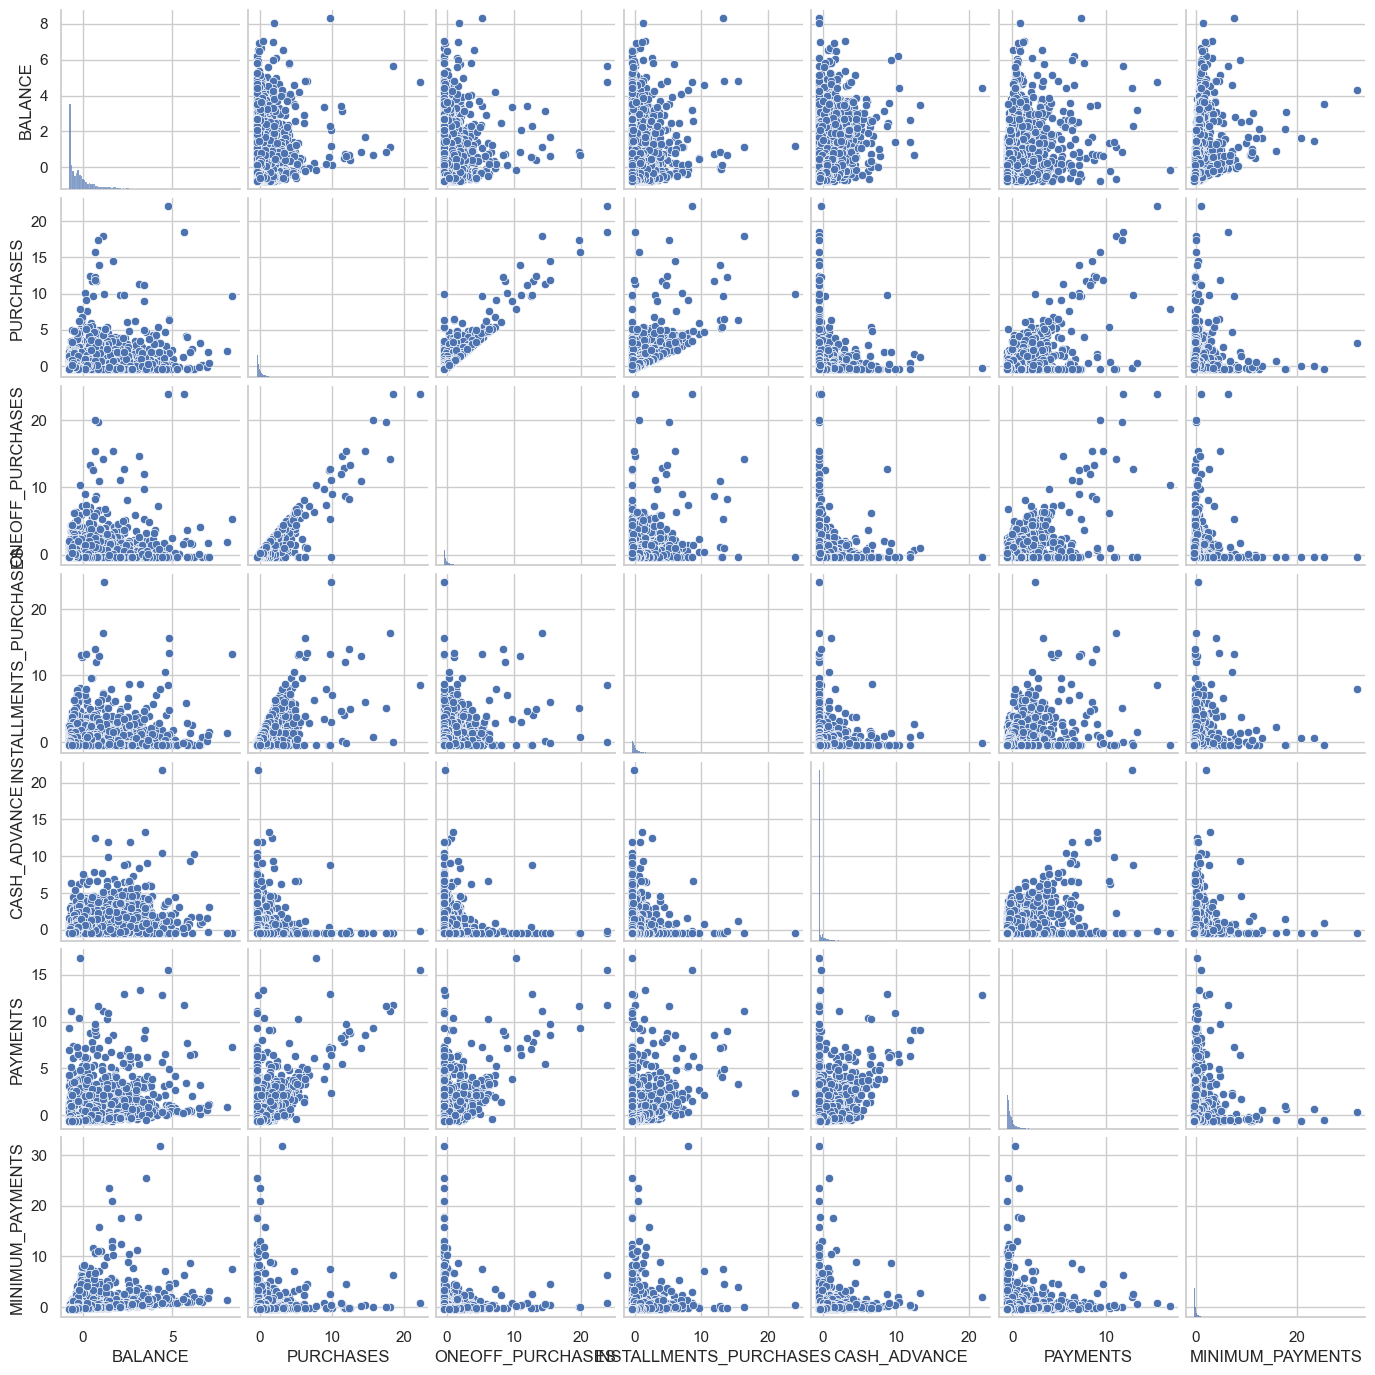

In [417]:

sns.pairplot(df[numeric_cols], height=2)
plt.show()


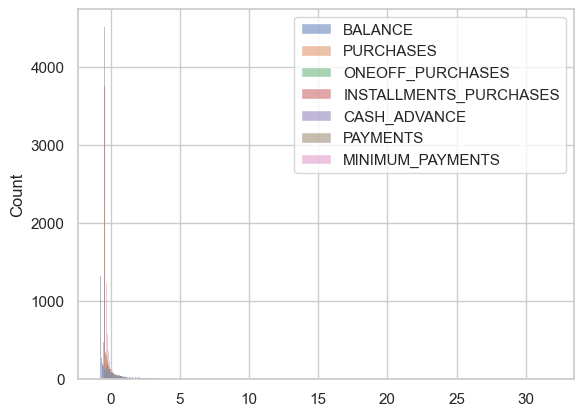

In [419]:
sns.histplot(df[numeric_cols])
plt.show()

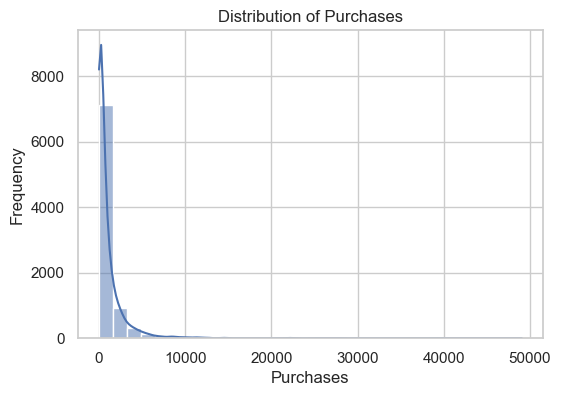

In [386]:
plt.figure(figsize=(6, 4))
sns.histplot(df['PURCHASES'], bins=30, kde=True)
plt.title('Distribution of Purchases')
plt.xlabel('Purchases')
plt.ylabel('Frequency')
plt.show()

The data in the purchases column is also skewed

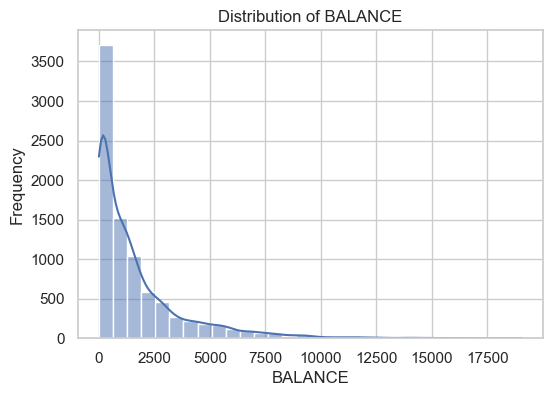

In [387]:

plt.figure(figsize=(6, 4))
sns.histplot(df['BALANCE'], bins=30, kde=True)
plt.title('Distribution of BALANCE')
plt.xlabel('BALANCE')
plt.ylabel('Frequency')
plt.show()

The distribution of balance is also heavily skewed

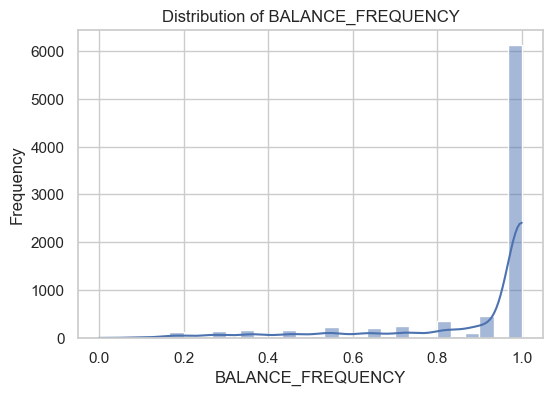

In [388]:
plt.figure(figsize=(6, 4))
sns.histplot(df['BALANCE_FREQUENCY'], bins=30, kde=True)
plt.title('Distribution of BALANCE_FREQUENCY')
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel('Frequency')
plt.show()

The distribution of balance is also heavily skewed

## Bivariate Analysis

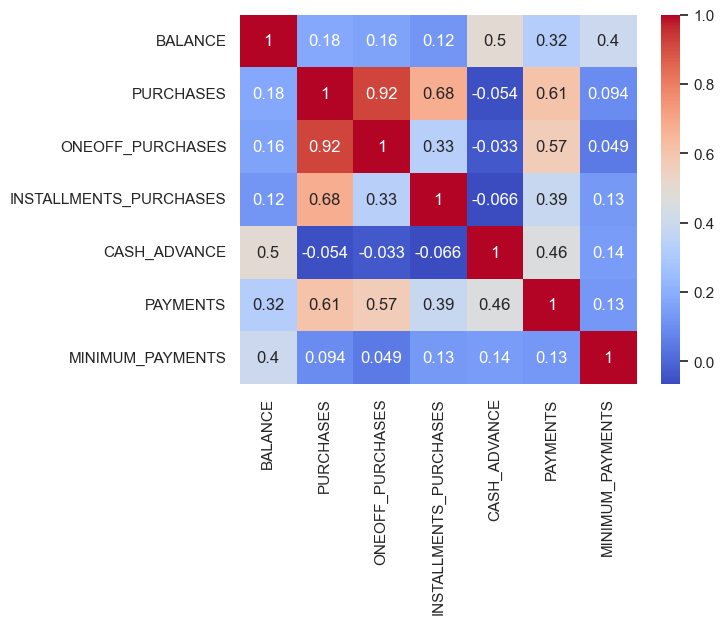

In [420]:


corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

I plotted a correlation matrix to see if there are values that are highly correlated to each other or not. However, it seems that apart from ONEOFF_PURCHASES and PURCHASES, there is no other combination that is highly correlated. It is to be noted that PURCHASES and INSTALLMENTS_PURCHASES have a score of 0.68. PURCHASES and PAYMENTS have a score fo 0.61. This means there is some level of correlation between these variables

To explore these relationships further, I have done bivariate analysis focussing on PURCHASES and PAYMENTS

Text(0.5, 1.0, 'Scatter Plot: PURCHASES vs. PAYMENTS')

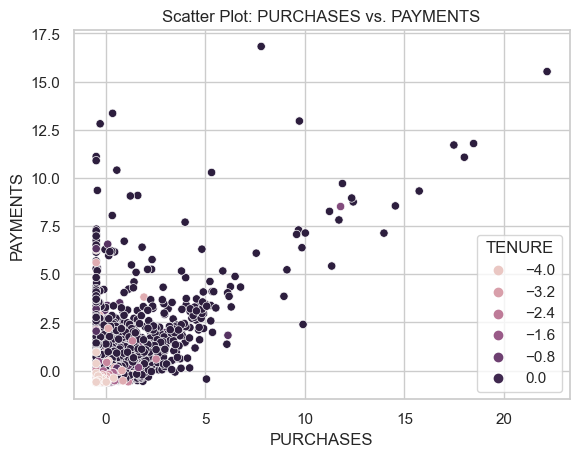

In [422]:
sns.scatterplot(data=df, x='PURCHASES', y='PAYMENTS', hue='TENURE')
plt.title('Scatter Plot: PURCHASES vs. PAYMENTS')

Text(0.5, 1.0, 'Scatter Plot: PURCHASES vs. PAYMENTS')

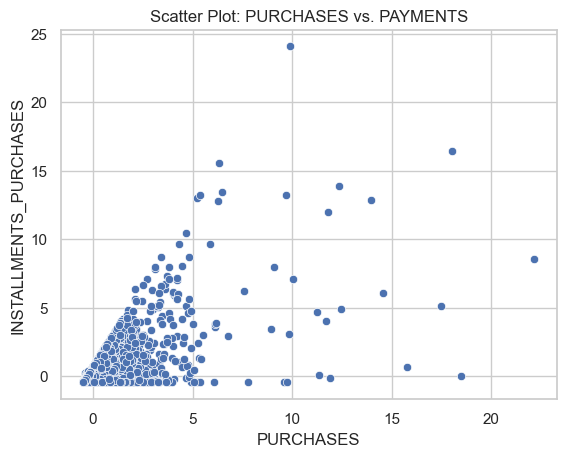

In [426]:
sns.scatterplot(data=df, x='PURCHASES', y='INSTALLMENTS_PURCHASES')
plt.title('Scatter Plot: PURCHASES vs. PAYMENTS')

<Axes: ylabel='Count'>

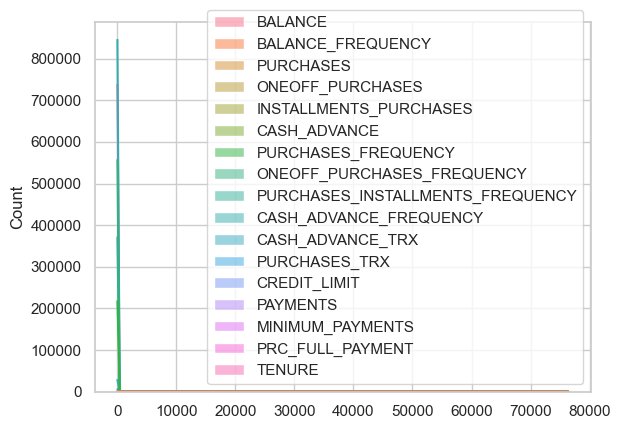

In [391]:

sns.histplot(df[numeric_cols], kde=True)


Text(0.5, 1.0, 'Count of TENURE')

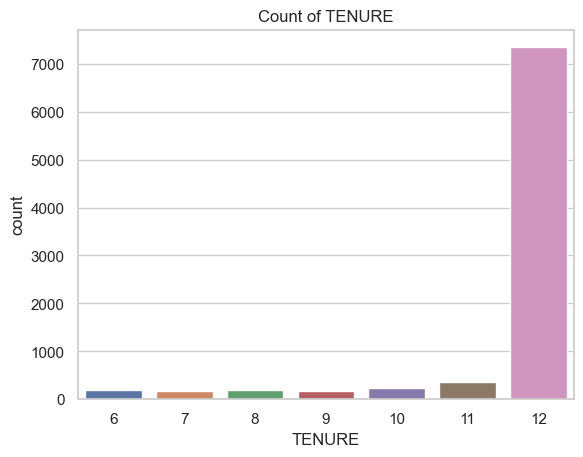

In [392]:
sns.countplot(x='TENURE', data=df)
plt.title('Count of TENURE')

Most people in this dataset have a tenure of 12

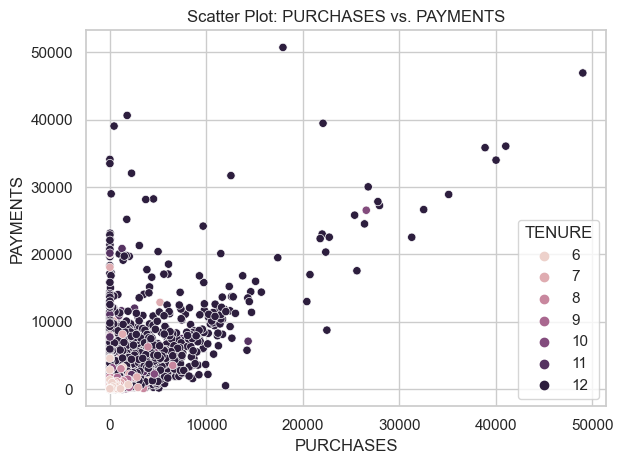

In [393]:
sns.scatterplot(data=df, x='PURCHASES', y='PAYMENTS', hue='TENURE')
plt.title('Scatter Plot: PURCHASES vs. PAYMENTS')

plt.tight_layout()
plt.show()

Both purchases and payments go up as tenure reaches 12

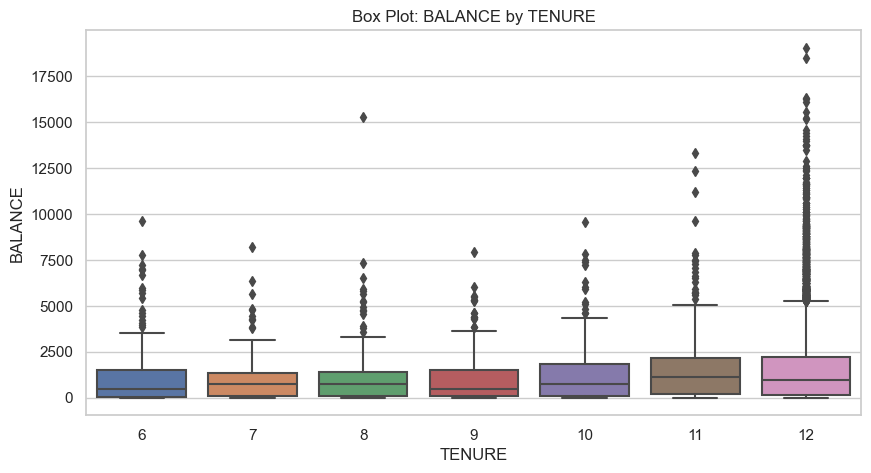

In [394]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="TENURE", y="BALANCE", data=df)
plt.title("Box Plot: BALANCE by TENURE")
plt.show()


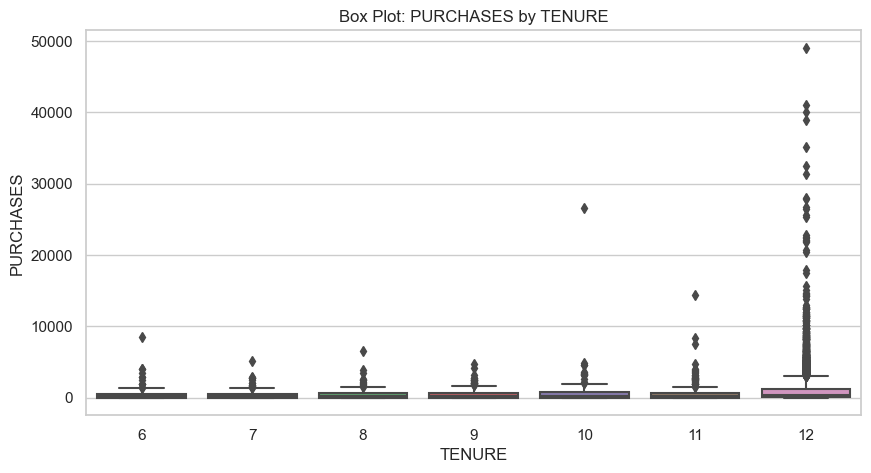

In [395]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="TENURE", y="PURCHASES", data=df)
plt.title("Box Plot: PURCHASES by TENURE")
plt.show()

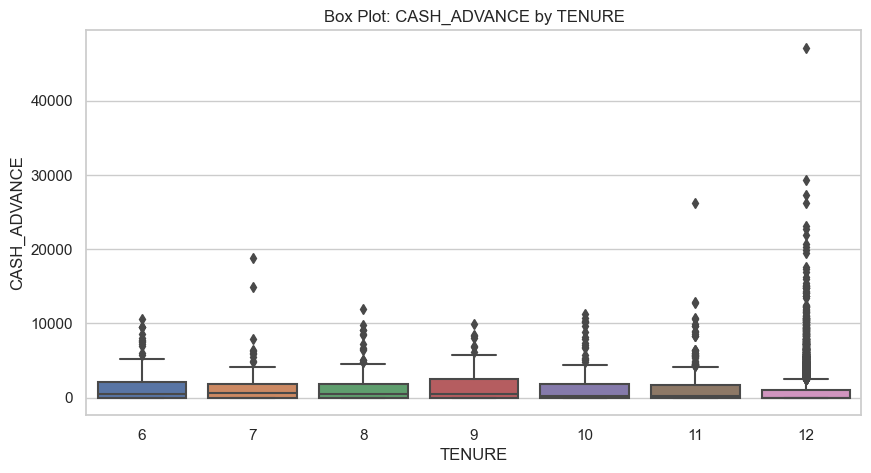

In [396]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="TENURE", y="CASH_ADVANCE", data=df)
plt.title("Box Plot: CASH_ADVANCE by TENURE")
plt.show()

The above boxplots show that there are some outliers in the dataset too but given how many outliers there are, they won't significantly affect the data so I am choosing to not remove them

In this section, I have selected four variables that I think are significant and plotted them by tenure

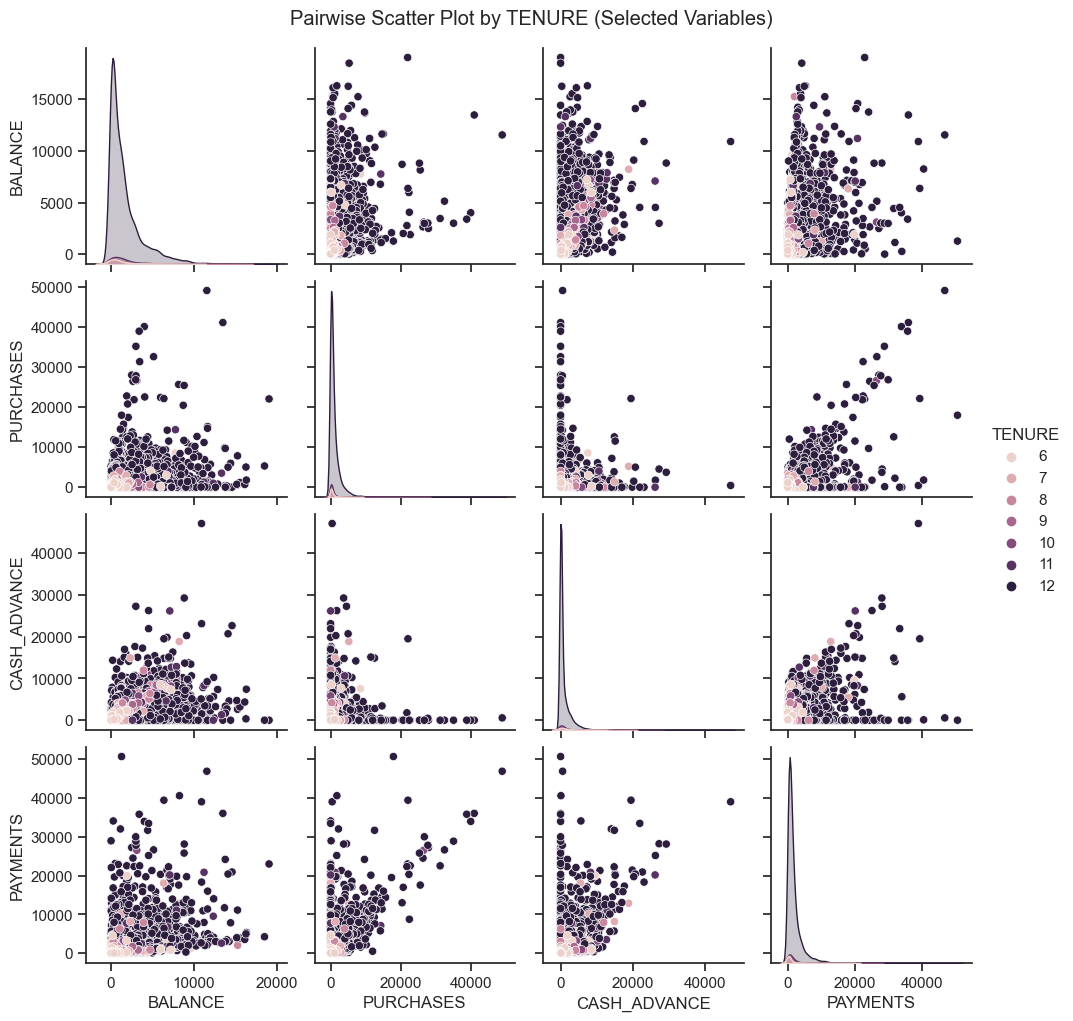

In [397]:
selected_numeric_cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS']
sns.set(style="ticks")
sns.pairplot(df, vars=selected_numeric_cols, hue="TENURE")
plt.suptitle("Pairwise Scatter Plot by TENURE (Selected Variables)", y=1.02)
plt.show()

Here, we can see that the tenure gets higher(higest being 12)  , other variables like purchases and balances also goes up. This means if customers use the credit card for a long time then they are more likely to have higher payments and purchase more

The selected variables in the pairplot were chosen because they provide insights into different aspects of a person's financial behavior when using a credit card:

BALANCE: Shows how much money is left in the credit card account.

PURCHASES: Tells us how much the person spent using the credit card.

CASH_ADVANCE: Indicates how much cash was borrowed from the credit card.

PAYMENTS: Shows the total amount of money paid to the credit card company.

By looking at the relationships between these variables in the pairplot, we can understand how they are connected and how they change depending on how long a person has had their credit card ("TENURE"). These insights help us understand financial behaviors and patterns in the data

## Clustering

In [399]:
num_col = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 
'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col)])
df[num_col] = preprocessor.fit_transform(df[num_col])

In [400]:
df_scaled = df.copy()
df_scaled.drop(['CUST_ID'], inplace=True, axis=1)

In [401]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,C10002,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,C10003,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
4,C10005,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
5,C10006,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


Principal Component Analysis (PCA) is a dimensionality reduction technique that can have a significant impact on clustering, both positive and negative, depending on the dataset and how it is applied. Here are some ways in which PCA affects clustering:

Positive Effects:

Dimension Reduction: PCA reduces the number of features while retaining most of the variance in the data. This can help to eliminate noise and irrelevant information, making the clustering process more efficient and effective.

Simplifies Interpretability: The reduced feature space can be easier to interpret, especially when dealing with a high-dimensional dataset. It can help identify the most influential features for clustering.

Improved Cluster Separation: In some cases, PCA can enhance cluster separation by emphasizing the most relevant features and reducing the impact of less important ones. This can lead to more distinct and well-separated clusters.

Enhances Visualizations: PCA can be used to create 2D or 3D visualizations of the data, making it easier to visualize and understand cluster structures, especially when dealing with high-dimensional data.

Negative Effects:

Loss of Information: PCA involves a loss of information, as it projects the data onto a lower-dimensional space. In some cases, this loss of information can impact the quality of clustering.

Sensitivity to Scaling: PCA is sensitive to the scale of the original features. If the features have significantly different scales, the resulting PCA components may be dominated by the high-variance features, potentially reducing the significance of other features.

In [402]:
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

pca_columns = [f'PC{i + 1}' for i in range(len(df_scaled.columns))]
df_pca = pd.DataFrame(df_pca, columns=pca_columns)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
output_df = pd.DataFrame({'Explained Variance Ratio': explained_variance, 'Cumulative Explained Variance Ratio': cumulative_variance})
print(output_df)

    Explained Variance Ratio  Cumulative Explained Variance Ratio
0               2.723118e-01                             0.272312
1               2.037431e-01                             0.476055
2               8.918334e-02                             0.565238
3               7.573609e-02                             0.640974
4               6.276618e-02                             0.703740
5               5.712786e-02                             0.760868
6               4.916188e-02                             0.810030
7               4.210734e-02                             0.852138
8               3.681697e-02                             0.888955
9               3.081508e-02                             0.919770
10              2.363804e-02                             0.943408
11              1.774540e-02                             0.961153
12              1.426710e-02                             0.975420
13              1.178660e-02                             0.987207
14        

The cumulative explained variance ratio tells us how much of the data's variance is captured when considering multiple principal components. In this case, the last entry indicates that almost 100% of the variance is explained when all principal components are considered. This suggests that we could potentially reduce the dimensionality of our data significantly while retaining most of the important information by using a subset of the principal components.

To decide how many principal components to retain, we will set a threshold (e.g., 90% cumulative explained variance) and select the number of principal components required to reach or exceed that threshold. This helps in reducing the dimensionality of the data while preserving most of the information.

In this data, PC1 through PC9 seem to be the most informative components, capturing about 91% of the total variance. 

In [403]:
df_pca = df_pca.iloc[:,0:9]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

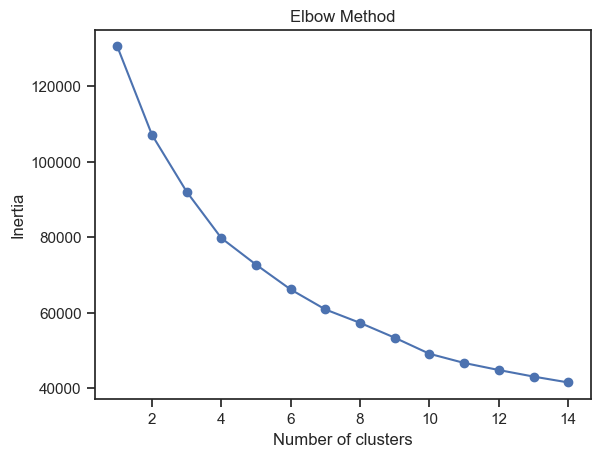

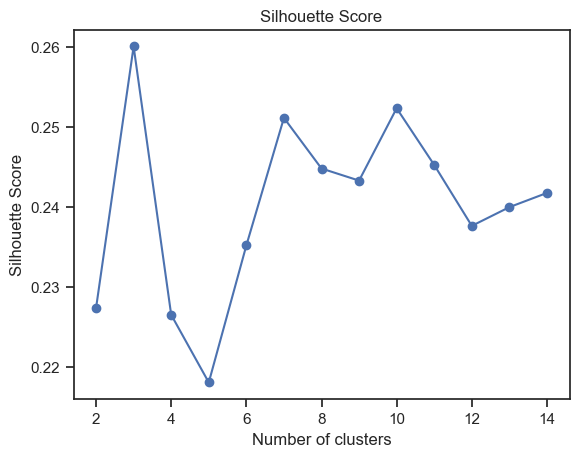

In [404]:
inertia = []
silhouette_avg = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(df_pca, labels)]

# Silhouette Score
plt.plot(range(1, 15), inertia,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
 
plt.plot(range(2, 15), silhouette_avg,marker = 'o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

   I will choose 6 as the optimum number of clusters here based on the two graphs here


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For K-Means Algorithm
silhouette_score is:  0.2353859397918093


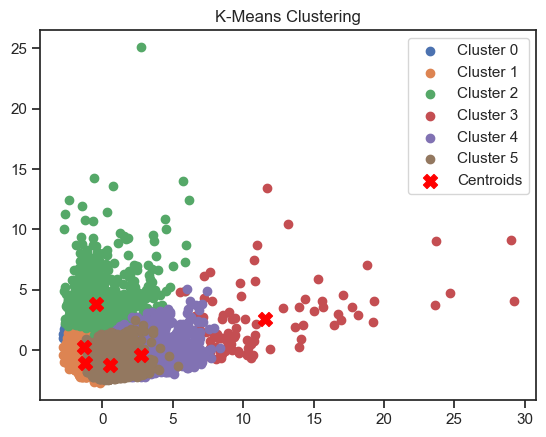

In [405]:
kmeans_model = KMeans(n_clusters=6, random_state=1).fit(df_pca)
klabels = kmeans_model.labels_

ss_kmeans = metrics.silhouette_score(df_pca, klabels, metric='euclidean')

print("For K-Means Algorithm")
print("silhouette_score is: ", ss_kmeans)

x_values = df_pca.iloc[:, 0].values
y_values = df_pca.iloc[:, 1].values

centroids = kmeans_model.cluster_centers_

for cluster_label in set(klabels):
    cluster_x = x_values[klabels == cluster_label]
    cluster_y = y_values[klabels == cluster_label]
    plt.scatter(cluster_x, cluster_y, label=f'Cluster {cluster_label}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')

plt.title('K-Means Clustering')
plt.legend()
plt.show()

A silhouette score around 0.2354 suggests that the K-Means algorithm has created clusters that are reasonably well-separated. The score is positive, which is a good sign.

DBSCAN Silhouette Score: 0.6448736975548581


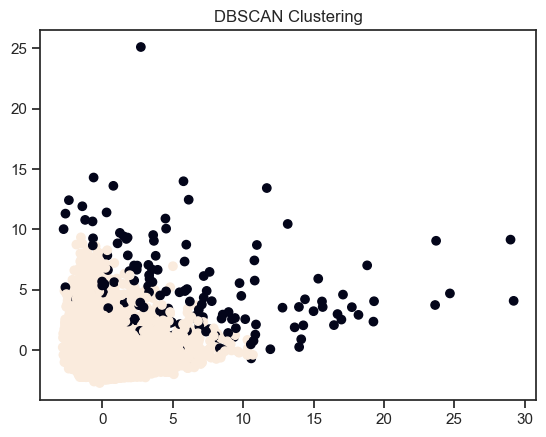

In [406]:
dbscan = DBSCAN(eps=2.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_pca)
 
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(df_pca, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")
 
x_values = df_pca.iloc[:, 0].values
y_values = df_pca.iloc[:, 1].values
 
plt.scatter(x_values,y_values, c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

A silhouette score of 0.6449 indicates that DBSCAN has done an excellent job in creating clusters with data points that are similar to each other within the same cluster and dissimilar to data points in other clusters. This is a strong indication of high-quality clustering results.

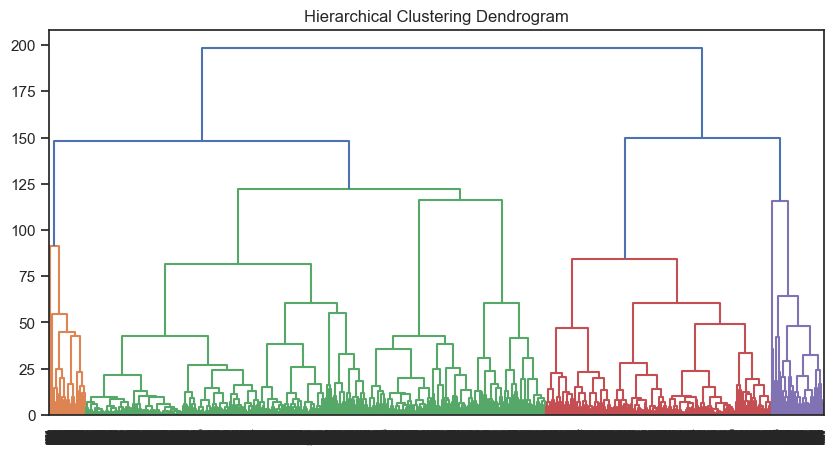

In [407]:

Z = linkage(df_pca, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


silhouette_score is:  0.1661257045202555


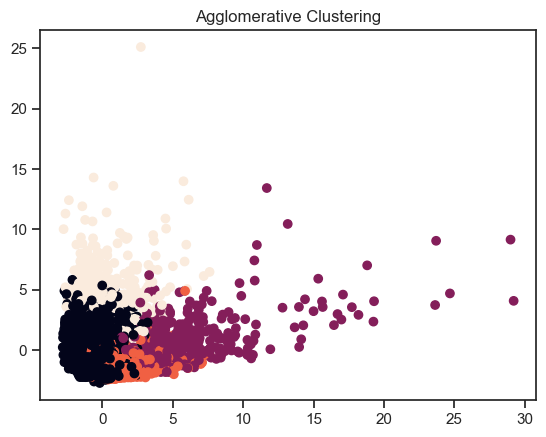

In [408]:
agglomerative = AgglomerativeClustering(n_clusters=4)
alabels = agglomerative.fit_predict(df_pca)
 
ss_agglomerative = metrics.silhouette_score(df_pca, alabels, metric='euclidean')
print("silhouette_score is: ", ss_agglomerative)
 
x_values = df_pca.iloc[:, 0].values
y_values = df_pca.iloc[:, 1].values
 
plt.scatter(x_values,y_values, c=alabels)#change colour
plt.title('Agglomerative Clustering')
plt.show()

A silhouette score around 0.1661 suggests that Agglomerative Clustering has created clusters that are somewhat separated, but the separation is not as distinct as in other clustering algorithms with higher silhouette scores

In [409]:
ss_scores = [ss_kmeans, dbscan_sil_score, ss_agglomerative]

data = {
    'Algorithm': ['K-Means', 'DBSCAN', 'Agglomerative'],
    'Silhouette Score': ss_scores,
}

score_df = pd.DataFrame(data)

print(score_df)

       Algorithm  Silhouette Score
0        K-Means          0.235386
1         DBSCAN          0.644874
2  Agglomerative          0.166126


Cluster Quality Comparison:

When evaluating the clustering algorithms for our dataset, it becomes evident that K-Means stands out as the most suitable method. Let's delve into the reasons why K-Means is the preferred choice for this dataset:

1. K-Means:

   - Silhouette Score: 0.235386
   - Cluster Separation: K-Means achieved a moderate silhouette score of approximately 0.2354.
   - Non-Overlapping Clusters: K-Means forms clusters with clear boundaries, and data points within each cluster are distinct from those in other clusters. This indicates that K-Means creates non-overlapping, well-defined clusters, which are essential for various applications where clear separation is required.

2. DBSCAN:

   - Silhouette Score: 0.644874
   - Cluster Separation: DBSCAN achieved a high silhouette score of about 0.6449, suggesting excellent cluster separation.
   - Overlapping Clusters: DBSCAN did not produce well-separated clusters. 

3. Agglomerative Clustering:

   - Silhouette Score: 0.166126
   - Cluster Separation: Agglomerative Clustering obtained a lower silhouette score, around 0.1661, indicating less distinct cluster separation.
   - Overlapping Clusters: The silhouette score suggests that Agglomerative Clustering's clusters are less well-defined and exhibit ssome degree of overlap.

In Summary:

Based on the silhouette scores and considering the requirement for non-overlapping clusters, K-Means is the preferred clustering method. K-Means excels in creating clusters with clear boundaries and minimal overlap among data points within each cluster, making it an appropriate choice for this dataset.


## Cluster Analysis

In [410]:
df_copy['Cluster'] = klabels

In [411]:
df_copy.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,4
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,5


In [412]:
cluster_sizes = df_copy['Cluster'].value_counts()

sorted_cluster_sizes = dict(sorted(cluster_sizes.items()))
for cluster_label, size in sorted_cluster_sizes.items():
    print(f"Cluster {cluster_label}: {size} data points")

Cluster 0: 2988 data points
Cluster 1: 1191 data points
Cluster 2: 956 data points
Cluster 3: 88 data points
Cluster 4: 1277 data points
Cluster 5: 2136 data points


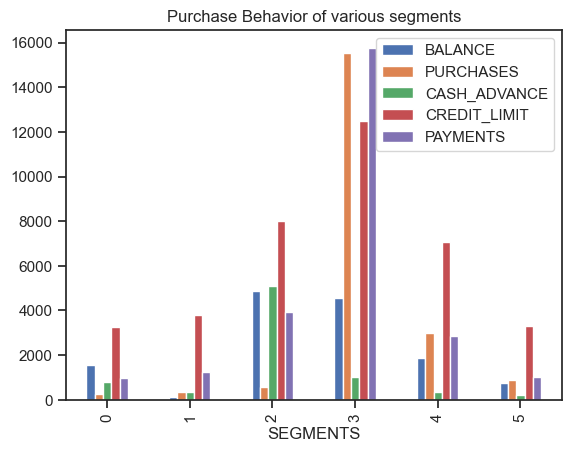

In [413]:
grouped_data = df_copy[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'Cluster']].groupby('Cluster').mean()
grouped_data.plot.bar()
plt.title('Purchase Behavior of various segments')
plt.xlabel('SEGMENTS')
plt.show()

<Figure size 1500x500 with 0 Axes>

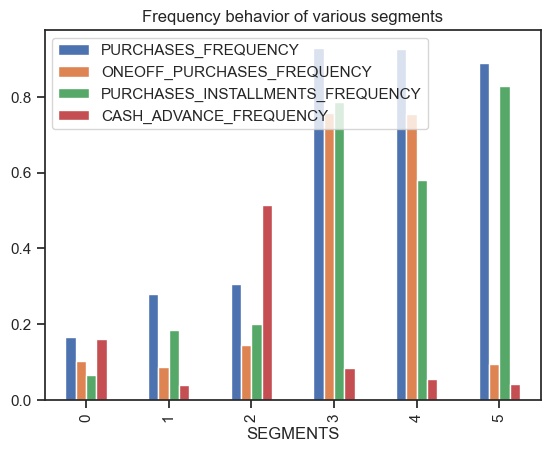

In [414]:
grouped_data2 = df_copy[['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'Cluster']].groupby('Cluster').mean()
plt.figure(figsize=(15, 5))
grouped_data2.plot.bar()
plt.title('Frequency behavior of various segments')
plt.xlabel('SEGMENTS')
plt.show()

In [431]:
df_copy.drop(['CUST_ID'], inplace=True, axis=1)

In [432]:
df_copy.groupby('Cluster').mean().T

Cluster,0,1,2,3,4,5
BALANCE,1552.727329,144.288364,4855.299479,4566.075524,1861.738411,747.125737
BALANCE_FREQUENCY,0.970096,0.439161,0.966726,0.977169,0.979218,0.958423
PURCHASES,263.730807,365.353401,550.536444,15545.461136,2979.828277,904.929429
ONEOFF_PURCHASES,214.888156,226.148027,336.656475,10504.035682,2091.996045,184.842243
INSTALLMENTS_PURCHASES,49.008273,139.454576,213.986318,5041.425455,887.832232,720.926737
CASH_ADVANCE,788.165402,341.248484,5089.336888,1037.118534,331.369133,208.054201
PURCHASES_FREQUENCY,0.165832,0.279477,0.305947,0.929735,0.926820,0.888221
ONEOFF_PURCHASES_FREQUENCY,0.101598,0.085677,0.145028,0.756164,0.755332,0.094974
PURCHASES_INSTALLMENTS_FREQUENCY,0.066044,0.183806,0.199925,0.786467,0.579856,0.827746
CASH_ADVANCE_FREQUENCY,0.161069,0.038424,0.514972,0.084280,0.055485,0.042475


## Customer Clusters and Characteristics

Based on the interpretation of the clusters, we can describe the general characteristics of customers falling into each cluster as follows:

### Cluster 0 (Low Activity Customers):
- Customers in this cluster tend to maintain high account balances.
- They have relatively low purchase activity.
- Their purchase transactions are infrequent, with minimal one-off and installment purchases.
- These customers make use of cash advance moderately.
- They have a moderate credit limit.
- Payments are on the lower side, and full payments are infrequent.
- This cluster may include customers who maintain high account balances for purposes other than making frequent purchases.

### Cluster 1 (Moderate Activity, Low Balance Customers):
- Customers in this cluster have the lowest average balance.
- They make moderate purchases, especially in installments.
- Cash advances are rarely used.
- These customers have moderate credit limits.
- Payments are moderate, with a higher percentage of full payments.
- This cluster could consist of customers who prefer lower balances but still make moderate purchases.

### Cluster 2 (High Balance, High Activity Customers):
- Customers in this cluster maintain very high account balances.
- They have a high frequency of balance updates.
- These customers make moderate to high-value purchases, including one-off and installment purchases.
- Cash advances are frequently used.
- They have high credit limits.
- Payments are relatively high, with higher minimum payments.
- Full payments are less common.
- This cluster may contain customers who maintain high balances and actively use their credit cards for various types of transactions.

The most significant features distinguishing between clusters are:
- **BALANCE**: The balance feature plays a crucial role in distinguishing between these clusters, as it directly relates to the customer's account balance.
- **PURCHASES**: The amount spent on purchases is another key feature that separates customers into different clusters.
- **CASH_ADVANCE**: The usage of cash advance is significant, as it varies considerably among clusters.
- **CREDIT_LIMIT**: Credit limits also play a vital role in cluster separation, as they influence the customers' spending capacity.
- **PAYMENTS**: The payment behavior, including the total payments and full payments, is essential in distinguishing between clusters.

These features collectively contribute to the cluster formation and help identify the kind of customers falling into each group based on their financial behaviors and preferences.

### Cluster 3 (High Purchase Frequency and Credit Limit, Low Balance):

**Customer Profile:**
- These customers have a relatively high purchase frequency, indicating they use their credit cards often for shopping.
- They have a high credit limit.
- Their balances tend to be lower, meaning they pay off their credit card bills more regularly.

**Distinguishing Features:**
- High values in "PURCHASES_FREQUENCY" and "CREDIT_LIMIT" signify their frequent shopping habits and access to a substantial credit line.
- The "BALANCE" feature is relatively low, indicating they maintain lower outstanding balances.

### Cluster 4 (High Balance, Low Activity):

**Customer Profile:**
- These customers maintain high balances on their credit cards but exhibit low purchase and cash advance activity.
- Their credit limit might not be as high in comparison to their balance.

**Distinguishing Features:**
- High "BALANCE" is the most significant feature, reflecting the large amount they keep in their credit card account.
- Low "PURCHASES" and "CASH_ADVANCE" activities indicate their infrequent card usage.

### Cluster 5 (Low Balance, Moderate Activity):

**Customer Profile:**
- Customers in this cluster have relatively low balances and engage in moderate purchase and cash advance activities.
- Their credit limits are generally moderate.
- They have a slightly higher tenure.

**Distinguishing Features:**
- Their "BALANCE" is low, signifying that they do not maintain large outstanding balances.
- The features "PURCHASES" and "CASH_ADVANCE" are moderate, suggesting they make occasional purchases and cash advances.
- The "TENURE" is slightly higher, indicating that they have been cardholders for a longer time.

These characteristics provide valuable insights into the behavior of customers in each cluster, helping businesses tailor their marketing and product strategies to meet the specific needs and preferences of each customer segment effectively.


## Business Recommendations for Customer Clusters

### Cluster 0 (Low Balance, Moderate Activity):

**Business Recommendations:**
- The business should target this segment with promotions and offers aimed at increasing their card usage. The business can incentivize them to make more purchases and utilize their credit limit effectively.
- The business can consider providing credit limit upgrades to encourage more spending while maintaining low balances.


### Cluster 1 (Low Balance, Low Activity):

**Business Recommendations:**
- These customers are inactive and have low balances. The business should reach out to them with marketing campaigns to raise awareness about card features and the benefits of using it.

### Cluster 2 (High Balance, Low Purchase Frequency):

**Business Recommendations:**
- These customers maintain high balances but exhibit low purchase frequency. The business should encourage them to make more frequent purchases.
- Promotion of attractive cashback or rewards programs will incentivize them to increase their card usage
- These customers can be given credit limit upgrades too

### Cluster 3 (High Purchase Frequency and Credit Limit, Low Balance):

**Business Recommendations:**
- The business should tailor marketing strategies based on each customer's purchase history. Personalized promotions can encourage more frequent and diversified purchases.
- The business can create loyalty programs that reward these customers for their ongoing loyalty.

### Cluster 4 (High Balance, Low Activity):

**Business Recommendations:**
- The business can implement credit monitoring to keep a close eye on customers' credit utilization and payment patterns. This proactive approach can help prevent potential risks associated with high credit usage.
-  Provide personalized credit management services, such as real-time alerts on credit limit usage. These services assist customers in maintaining their financial health.

### Cluster 5 (Low Balance, Moderate Activity):

**Business Recommendations:**
- The business can develop personalized rewards programs to motivate customers to use their credit cards more frequently.
- The business can create flexible payment options for these customers to manage their moderate balances.

